In [1]:
import pandas as pd
df = pd.read_csv('C:/Users/11816/Desktop/mechine learning/Group Project/MLF_GP1_CreditScore.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 28 columns):
Sales/Revenues              1700 non-null float64
Gross Margin                1700 non-null float64
EBITDA                      1700 non-null float64
EBITDA Margin               1700 non-null float64
Net Income Before Extras    1700 non-null float64
Total Debt                  1700 non-null float64
Net Debt                    1700 non-null float64
LT Debt                     1700 non-null float64
ST Debt                     1700 non-null float64
Cash                        1700 non-null float64
Free Cash Flow              1700 non-null float64
Total Debt/EBITDA           1700 non-null float64
Net Debt/EBITDA             1700 non-null float64
Total MV                    1700 non-null float64
Total Debt/MV               1700 non-null float64
Net Debt/MV                 1700 non-null float64
CFO/Debt                    1700 non-null float64
CFO                         1700 non-null f

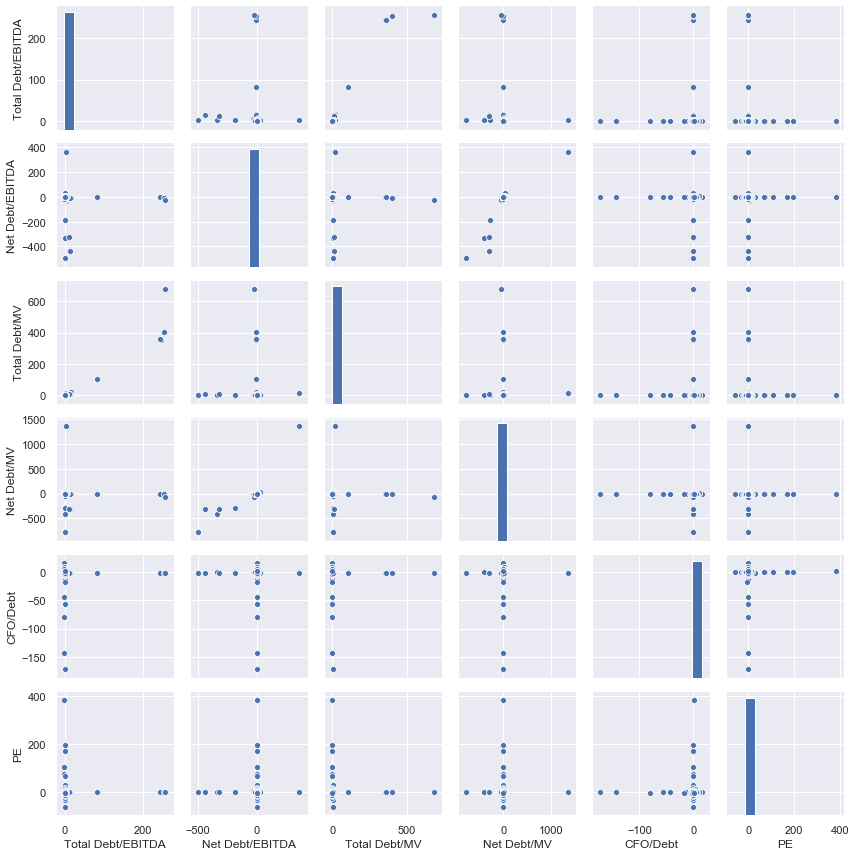

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
cols = ['Total Debt/EBITDA','Net Debt/EBITDA','Total Debt/MV','Net Debt/MV', 'CFO/Debt','PE']
sns.pairplot(df[cols], height=2)
plt.tight_layout()
plt.show()

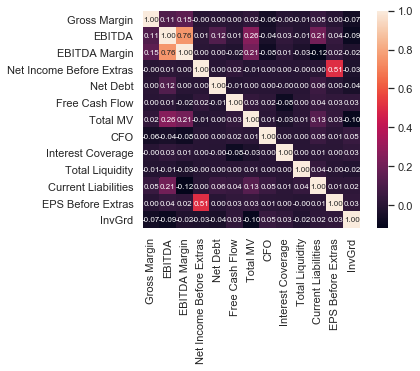

In [55]:
import numpy as np
cols1 = ['Gross Margin','EBITDA','EBITDA Margin','Net Income Before Extras','Net Debt','Free Cash Flow', 
         'Total MV', 'CFO', 'Interest Coverage','Total Liquidity'
         ,'Current Liabilities','EPS Before Extras','InvGrd']
cm = np.corrcoef(df[cols1].values.T)
sns.set(font_scale=1.0)
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 8},yticklabels=cols1,
                xticklabels=cols1)
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-2].values
y = df['InvGrd'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,stratify=y,random_state=42)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [23]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[3.88214487e+00 3.16430608e+00 2.94154234e+00 2.06037265e+00
 2.00534615e+00 1.98575077e+00 1.52301187e+00 7.84510687e-01
 8.25824583e-01 1.05497282e+00 9.55942084e-01 9.75224295e-01
 9.84058289e-01 9.91316234e-01 1.00406925e+00 4.51687704e-01
 1.64842407e-01 1.20193757e-01 4.71948899e-02 3.50531283e-02
 2.67004453e-02 1.30121711e-02 1.05897124e-02 9.77067259e-03
 3.19181707e-04 2.48507414e-04]


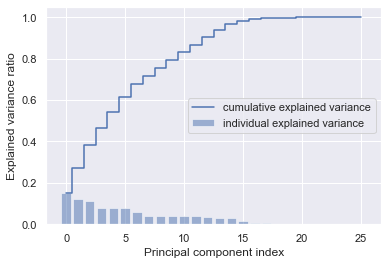

In [25]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(0,26), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(0,26), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [33]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini',
                              max_depth=4,
                              random_state=1)
tree.fit(X_train_pca, y_train)
train_score=tree.score(X_train_pca,y_train)
test_score=tree.score(X_test_pca,y_test)
print('training score: %.6f' %train_score)
print('testing score: %.6f' %test_score)

training score: 0.816609
testing score: 0.772549


In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2,metric='minkowski')
knn.fit(X_train_pca, y_train)
train_score=knn.score(X_train_pca,y_train)
test_score=knn.score(X_test_pca,y_test)
print('training score: %.6f' %train_score)
print('testing score: %.6f' %test_score)

training score: 0.844983
testing score: 0.768627


In [37]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=100.0,random_state=1)
lr.fit(X_train_pca, y_train)
train_score=lr.score(X_train_pca,y_train)
test_score=lr.score(X_test_pca,y_test)
print('training score: %.6f' %train_score)
print('testing score: %.6f' %test_score)

training score: 0.764014
testing score: 0.760784


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [38]:
from sklearn.model_selection import GridSearchCV
param_range=[1,2,3,4,5,6,7]
criterion_range=['gini','entropy']
param_grid=[{'criterion':criterion_range,'max_depth':param_range,'random_state':param_range}]
gs=GridSearchCV(estimator=tree,param_grid=param_grid,scoring='accuracy',cv=10)
gs.fit(X_train_pca, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.7771626297577855
{'criterion': 'gini', 'max_depth': 6, 'random_state': 4}


In [39]:
new_tree = DecisionTreeClassifier(criterion='gini',
                              max_depth=6,
                              random_state=4)
new_tree.fit(X_train_pca, y_train)
train_score=new_tree.score(X_train_pca,y_train)
test_score=new_tree.score(X_test_pca,y_test)
print('training score: %.6f' %train_score)
print('testing score: %.6f' %test_score)

training score: 0.851903
testing score: 0.752941


In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
kfold=StratifiedKFold(n_splits=10,random_state=1).split(X_train_pca,y_train)
train_scores=cross_val_score(estimator=new_tree,X=X_train_pca,y=y_train,cv=10)
test_scores=cross_val_score(estimator=new_tree,X=X_test_pca,y=y_test,cv=10)
print('train cv accuracy: %.6f +/- %.6f' % (np.mean(train_scores),np.std(train_scores)))
print('test cv accuracy: %.6f +/- %.6f' % (np.mean(test_scores),np.std(test_scores)))

train cv accuracy: 0.777143 +/- 0.025127
test cv accuracy: 0.709533 +/- 0.075309


In [43]:
from sklearn.metrics import confusion_matrix
y_pred=new_tree.predict(X_test_pca)
confmat=confusion_matrix(y_true=y_test,y_pred=y_pred)
print(confmat)

[[ 26  36]
 [ 27 166]]


In [45]:
from sklearn.metrics import precision_score,recall_score,f1_score
print('precision: %.6f' % precision_score(y_true=y_test,y_pred=y_pred))
print('recall: %.6f' % recall_score(y_true=y_test,y_pred=y_pred))
print('f1: %.6f' % f1_score(y_true=y_test,y_pred=y_pred))

precision: 0.821782
recall: 0.860104
f1: 0.840506


In [48]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(base_estimator=new_tree,n_estimators=200,learning_rate=0.1,random_state=1)
ada.fit(X_train_pca,y_train)
train_score=ada.score(X_train_pca,y_train)
test_score=ada.score(X_test_pca,y_test)
print('training score: %.6f' %train_score)
print('testing score: %.6f' %test_score)

training score: 1.000000
testing score: 0.800000


In [49]:
train_scores=cross_val_score(estimator=ada,X=X_train_pca,y=y_train,cv=10)
test_scores=cross_val_score(estimator=ada,X=X_test_pca,y=y_test,cv=10)
print('train cv accuracy: %.6f +/- %.6f' % (np.mean(train_scores),np.std(train_scores)))
print('test cv accuracy: %.6f +/- %.6f' % (np.mean(test_scores),np.std(test_scores)))

train cv accuracy: 0.795194 +/- 0.021922
test cv accuracy: 0.722103 +/- 0.079043


In [50]:
from sklearn.metrics import confusion_matrix
y_pred=ada.predict(X_test_pca)
confmat=confusion_matrix(y_true=y_test,y_pred=y_pred)
print(confmat)

[[ 24  38]
 [ 13 180]]


In [51]:
from sklearn.metrics import precision_score,recall_score,f1_score
print('precision: %.6f' % precision_score(y_true=y_test,y_pred=y_pred))
print('recall: %.6f' % recall_score(y_true=y_test,y_pred=y_pred))
print('f1: %.6f' % f1_score(y_true=y_test,y_pred=y_pred))

precision: 0.825688
recall: 0.932642
f1: 0.875912
